# Rowan Morse: Pittsburgh Neighborhood Traffic Data
- Link to data set: https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh 

In [50]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

## Metric: Average Daily Car Traffic 
### Why? 
1) **Congestion**: Understanding the amount of traffic in an area is an essential metric for determining how congested an area may be. High congestion could impact the ability to commute impacting their overall quality of life
2) **Urban Planning**: Areas prone to high traffic could correlate with poor urban development, highlighting areas that do not receive sufficient attention from the city in terms of infrastructure and planning.
3) **Emergency Response Time**: High traffic volumes can slow down ambulances, fire trucks, and police vehicles, making it harder to respond quickly to incidents.
4) **Economic**: High traffic may also exist in high economic areas with businesses that attract daily commuters, which would most likely displease residents. 

## Dataset: City of Pittsburgh Traffic Count 
- The dataset we used was collected by the City of Pittsburgh to determine where to install speed bumps.
- In various locations data was collected over a week span then summed/averaged. 

In [2]:
data = pd.read_csv("traffic.csv")

- We can see in the code cell below that data was collected in different neighborhoods more times than others (E.g. data was collected from Squirrel Hill South 28 different weeks, but only one week for Allegheny Center).

In [24]:
instance_counts = data.groupby('neighborhood').size()
instance_counts = instance_counts.sort_values(ascending=False)
instance_counts.head

<bound method NDFrame.head of neighborhood
Squirrel Hill South    28
Bloomfield             21
Shadyside              18
Mount Washington       16
Highland Park          16
                       ..
Regent Square           1
Lincoln Place           1
Allegheny West          1
Oakwood                 1
Allegheny Center        1
Length: 74, dtype: int64>

- To solve the issue of different sample sizes for each neighborhood we take the average of the neighborhood samples for average daily car traffic.
- Below we grouped each neighborhood with its mean daily car traffic between all samples and sorted from lowest to highest. This way we can see which neighborhoods had the least traffic

In [36]:
daily_traffic = data.groupby("neighborhood")['average_daily_car_traffic'].mean()
daily_traffic = daily_traffic.sort_values(ascending=True)
daily_traffic.head(10)

neighborhood
South Side Flats             115.000000
Lincoln Place                126.000000
Lincoln-Lemington-Belmar     195.000000
Fineview                     419.000000
Allegheny West               477.000000
New Homestead                666.000000
Overbrook                    777.000000
Summer Hill                  937.000000
Upper Hill                   953.333333
Central Northside           1189.000000
Name: average_daily_car_traffic, dtype: float64

## Visualization: Heat Map 
- We can use a heat map to gain a better understanding of which neighborhoods have the least amount of car traffic

<Axes: >

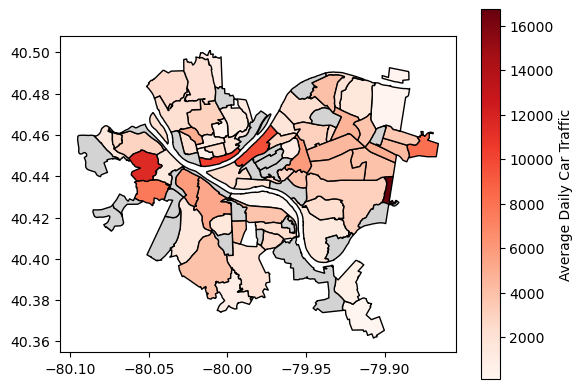

In [22]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
traffic_map = neighborhoods.merge(daily_traffic, how='left', left_on='hood', right_on='neighborhood')
traffic_map[['hood','average_daily_car_traffic','geometry']].head()
traffic_map.plot(column='average_daily_car_traffic', # set the data to be used for coloring
               cmap='Reds',              # choose a color palette
               edgecolor="Black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Average Daily Car Traffic"}, # label the legend
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Problem: Missing Data!!!
- As we can see from the map several neighborhoods are grey. This means that the data set is missing data for average daily car traffic in those specific neighborhood regions. 
## Solution: Fill Missing Data 
- Rather than recording more data or completely scrapping the dataset, we can fill in traffic data for the empty neighborhoods.
    ### What do we fill the missing values with?
  1) One option would be to fill the empty data with zeros, but since our goal is to combine our 3 submetrics to conlude the "Best Neighborhhod" this would be inefficient for a combined analyisis.
  2) Our second option would be to fill the empty data with a single value that represents the middle point of our data: either **mean/average** or **median**.
      - **Mean:** Because mean/average is sensitive to outliers if there are any extreme high/low values using the mean would accurately represent the center of our data.
      - **Median:**  The median is the middle value of the data when it is sorted and is "resistant" to outliers. Therefore, extreme values wont distort the median value.
### By creating a boxplot we can conclude which is a better measure of center between the mean and median. 



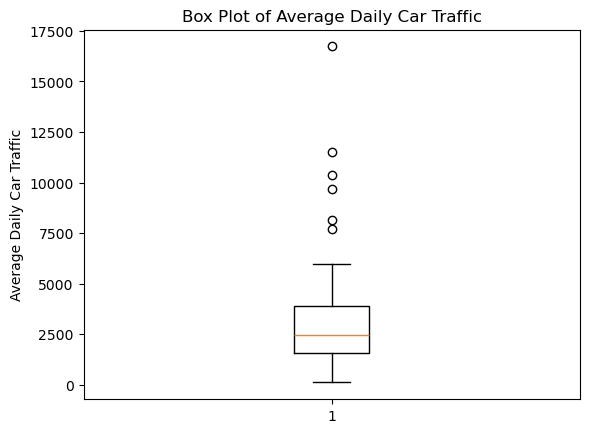

count       64.000000
mean      3292.866280
std       2919.243458
min        115.000000
25%       1556.300000
50%       2439.750000
75%       3920.577778
max      16729.000000
Name: average_daily_car_traffic, dtype: float64


In [33]:
plt.boxplot(daily_traffic.dropna())
plt.title('Box Plot of Average Daily Car Traffic')
plt.ylabel('Average Daily Car Traffic')
plt.show()
print(daily_traffic.describe())

### Boxplot Explanation 
- The circles represent data points that are considered outliers or extreme high values in this case.
- Therefore, nased on the box plot we can conclude that the **median** is the most accurate measure of center.
### Now we can fill in the missing data using the median and replot the heat map!

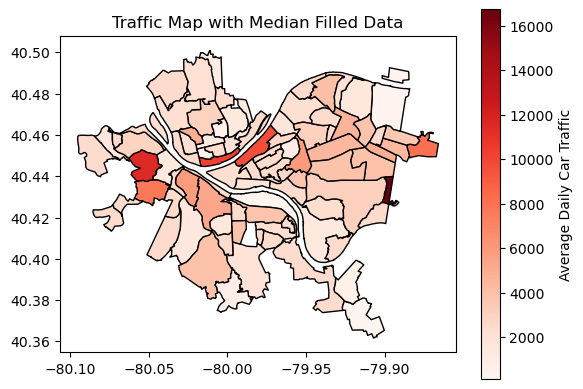

In [39]:
median_traffic = daily_traffic.median() # Calculate median
traffic_map['average_daily_car_traffic'] = traffic_map['average_daily_car_traffic'].fillna(median_traffic) # Fill missing data 

## Plot map
traffic_map.plot(column='average_daily_car_traffic', 
                 cmap='Reds', 
                 edgecolor="Black", 
                 legend=True, 
                 legend_kwds={'label': "Average Daily Car Traffic"}, 
                 missing_kwds={"color": "lightgrey"})
plt.title('Traffic Map with Median Filled Data')
plt.show()

## Visualize Data: Bar Chart 
- To visualize the best neighborhoods in terms of low traffic we can create a bar chart of the ten neighborhoods with the least amount of daily car traffic

Text(0, 0.5, 'Average Daily Car Traffic')

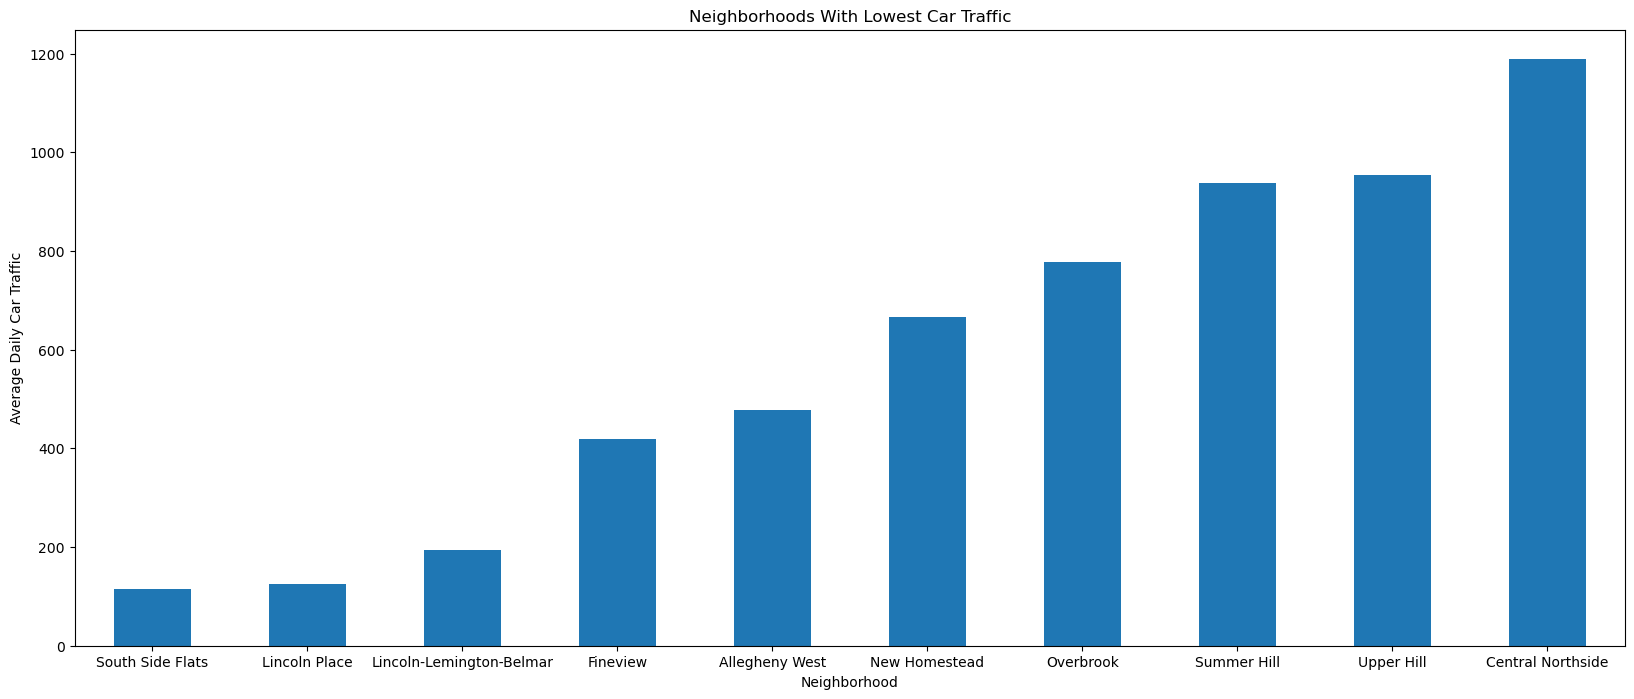

In [49]:
top_10 = daily_traffic.head(10)
traffic_bar = top_10.plot.bar(rot=0,figsize = (20,8))
traffic_bar.set_title('Neighborhoods With Lowest Car Traffic')
traffic_bar.set_xlabel('Neighborhood')
traffic_bar.set_ylabel('Average Daily Car Traffic')